<a href="https://colab.research.google.com/github/Javier-16/Titanic-datos/blob/Trabajar-aqui-uwu/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/Javier-16/Titanic-datos.git
%cd Titanic-datos


Cloning into 'Titanic-datos'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 24.00 KiB | 24.00 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/Titanic-datos/Titanic-datos/Titanic-datos/Titanic-datos


In [10]:
import pandas as pd # Para manejo de DataFrames
import numpy as np
import matplotlib.pyplot as plt # Para control de figuras
import seaborn as sns # Para visualizaciones (boxplot, heatmap)
from sklearn.model_selection import train_test_split, GridSearchCV # Para dividir datos en train/test y busqueda de grilla.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # Para escalado robusto
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression # Modelo Regresión Logística
from sklearn.ensemble import RandomForestClassifier # Modelo Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (                          # Métricas de evaluación
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay,
                                                       roc_curve, auc
)
from sklearn.feature_selection import SelectKBest, f_classif # Selector y criterio ANOVA F, respectivamente.

from sklearn.impute import SimpleImputer
import numpy as np

In [19]:
df = pd.read_csv('titanic.csv')

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [21]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


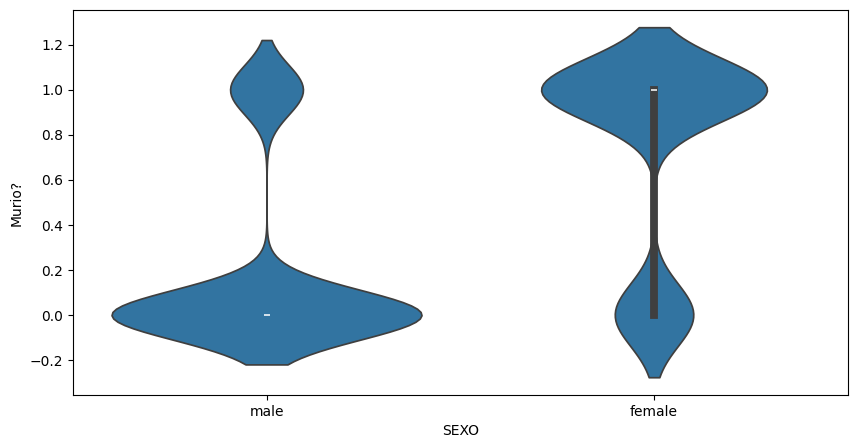

In [26]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Sex", y="Survived", data=df)

plt.xlabel("SEXO")
plt.ylabel("Murio?")
plt.show()